<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: COVID-19 Dashboard
Caderno de **Aula**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Análise Exploratória de Dados;</li>
  <li>Visualização Interativa de Dados;</li>
  <li>Storytelling.</li>
</ol>

---

# **Aulas**

## 1\. Introdução

### **1.1. TLDR** (too long didn't read)

 - **Dashboard**: 
  - [Google Data Studio](https://lookerstudio.google.com/reporting/55c53de4-f5cc-49ab-a1de-c47727ff505e).
 - **Processamento**:
  - [Kaggle Notebook](). 
 - **Fontes**: 
  - Casos pela universidade John Hopkins ([link](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports));
  - Vacinação pela universidade de Oxford ([link](https://covid.ourworldindata.org/data/owid-covid-data.csv)).

### **1.2. Pandemia Coronavírus 2019** 

> A COVID-19 é uma infecção respiratória aguda causada pelo coronavírus SARS-CoV-2, potencialmente grave, de elevada transmissibilidade e de distribuição global. Fonte: Governo brasileiro ([link](https://www.gov.br/saude/pt-br/coronavirus/o-que-e-o-coronavirus)).

A disponibilidade de dados sobre a evolução da pandemia no tempo em uma determinada região geográfica é fundamental para o seu combate! Este projeto busca construir um dashboard de dados para exploração e visualização interativa de dados sobre o avanço de casos e da vacinação do Brasil. O processamento de dados está neste [link](https://colab.research.google.com/drive/1sX3iPFdNX44aoH9_rbAbuQX6ZWYag6rl?usp=sharing) e o dashboard, neste [link](https://lookerstudio.google.com/reporting/55c53de4-f5cc-49ab-a1de-c47727ff505e).

### **1.3. Dados** 

Os dados sobre **casos da COVID-19** são compilados pelo centro de ciência de sistemas e engenharia da universidade americana **John Hopkins** ([link](https://www.jhu.edu)). Os dados são atualizados diariamente deste janeiro de 2020 com uma granularidade temporal de dias e geográfica de regiões de países (estados, condados, etc.). O website do projeto pode ser acessado neste [link](https://systems.jhu.edu/research/public-health/ncov/) enquanto os dados, neste [link](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports). Abaixo estão descritos os dados derivados do seu processamento.

 - **date**: data de referência;
 - **state**: estado;
 - **country**: país; 
 - **population**: população estimada;
 - **confirmed**: número acumulado de infectados;
 - **confirmed_1d**: número diário de infectados;
 - **confirmed_moving_avg_7d**: média móvel de 7 dias do número diário de infectados;
 - **confirmed_moving_avg_7d_rate_14d**: média móvel de 7 dias dividido pela média móvel de 7 dias de 14 dias atrás;
 - **deaths**: número acumulado de mortos;
 - **deaths_1d**: número diário de mortos;
 - **deaths_moving_avg_7d**: média móvel de 7 dias do número diário de mortos;
 - **deaths_moving_avg_7d**: média móvel de 7 dias dividido pela média móvel de 7 dias de 14 dias atrás;
 - **month**: mês de referência;
 - **year**: ano de referência.

Os dados sobre **vacinação da COVID-19** são compilados pelo projeto Nosso Mundo em Dados (*Our World in Data* ou OWID) da universidade britânica de **Oxford** ([link](https://www.ox.ac.uk)). Os dados são **atualizados diariamente** deste janeiro de 2020 com uma **granularidade temporal de dias e geográfica de países**. O website do projeto pode ser acessado neste [link](https://ourworldindata.org) enquanto os dados, neste [link](https://covid.ourworldindata.org/data/owid-covid-data.csv). Abaixo estão descritos os dados derivados do seu processamento.

 - **date**: data de referência;
 - **country**: país;
 - **population**: população estimada;
 - **total**: número acumulado de doses administradas;
 - **one_shot**: número acumulado de pessoas com uma dose;
 - **one_shot_perc**: número acumulado relativo de pessoas com uma dose;
 - **two_shots**: número acumulado de pessoas com duas doses;
 - **two_shot_perc**: número acumulado relativo de pessoas com duas doses;
 - **three_shots**: número acumulado de pessoas com três doses;
 - **three_shot_perc**: número acumulado relativo de pessoas com três doses;
 - **month**: mês de referência;
 - **year**: ano de referência.

## 2\. Análise Exploratória de Dados

Nesta sessão vamos utilizar os seguintes pacotes Python para processar os dados bruto em um formato adequado para um painel para exploração interativa de dados.

In [1]:
import math
from typing import Iterator
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### **2.1. Casos** 

Vamos processar os dados de **casos** da universidade John Hopkins.



#### **2.1.1. Extração**

O dado está compilado em um arquivo por dia, exemplo para 2021/12/01.

In [2]:
cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-12-2021.csv', sep=',')

In [3]:
cases.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-13 05:22:15,33.93911,67.709953,53584,2301,44608,6675,Afghanistan,137.647787,4.294192
1,NaN,NaN,NaN,Albania,2021-01-13 05:22:15,41.15330,20.168300,64627,1252,38421,24954,Albania,2245.708527,1.937271
2,NaN,NaN,NaN,Algeria,2021-01-13 05:22:15,28.03390,1.659600,102641,2816,69608,30217,Algeria,234.067409,2.743543
3,NaN,NaN,NaN,Andorra,2021-01-13 05:22:15,42.50630,1.521800,8682,86,7930,666,Andorra,11236.653077,0.990555
4,NaN,NaN,NaN,Angola,2021-01-13 05:22:15,-11.20270,17.873900,18343,422,15512,2409,Angola,55.811022,2.300605


In [4]:
cases.query('Country_Region == "Brazil"').sample(n=10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
59,NaN,NaN,Rio Grande do Norte,Brazil,2021-01-13 05:22:15,-5.4026,-36.9541,126261,3140,88210,34013,"Rio Grande do Norte, Brazil",3574.087651,2.485280
62,NaN,NaN,Rondonia,Brazil,2021-01-13 05:22:15,-11.5057,-63.5806,103798,1951,85353,16495,"Rondonia, Brazil",5840.453516,1.878649
64,NaN,NaN,Santa Catarina,Brazil,2021-01-13 05:22:15,-27.2423,-50.2189,526024,5707,494693,25624,"Santa Catarina, Brazil",7341.794342,1.084931
63,NaN,NaN,Roraima,Brazil,2021-01-13 05:22:15,-2.7376,-62.0751,70086,800,67408,1685,"Roraima, Brazil",11537.223426,1.137534
48,NaN,NaN,Espirito Santo,Brazil,2021-01-13 05:22:15,-19.1834,-40.3089,267451,5384,243995,17946,"Espirito Santo, Brazil",6652.059771,2.013295
45,NaN,NaN,Bahia,Brazil,2021-01-13 05:22:15,-12.5797,-41.7007,515861,9480,499577,6804,"Bahia, Brazil",3468.424529,1.837704
52,NaN,NaN,Mato Grosso do Sul,Brazil,2021-01-13 05:22:15,-20.7722,-54.7852,146143,2609,129646,12815,"Mato Grosso do Sul, Brazil",5219.457745,1.783548
43,NaN,NaN,Amapa,Brazil,2021-01-13 05:22:15,0.9020,-52.0030,71689,981,54715,15993,"Amapa, Brazil",8476.572338,1.368411
42,NaN,NaN,Alagoas,Brazil,2021-01-13 05:22:15,-9.5713,-36.7820,109319,2577,103446,3296,"Alagoas, Brazil",3275.616004,2.357321
66,NaN,NaN,Sergipe,Brazil,2021-01-13 05:22:15,-10.5741,-37.3857,124276,2595,107105,14576,"Sergipe, Brazil",5406.369524,2.088094


In [5]:
cases.query('Province_State == "Arizona"')

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
747,4001.0,Apache,Arizona,US,2021-01-13 05:22:15,35.394650,-109.489238,8355,260,0,8095,"Apache, Arizona, US",11622.407389,3.111909
748,4003.0,Cochise,Arizona,US,2021-01-13 05:22:15,31.879347,-109.751609,9232,172,0,9060,"Cochise, Arizona, US",7331.522689,1.863085
749,4005.0,Coconino,Arizona,US,2021-01-13 05:22:15,35.838834,-111.770718,13089,237,0,12852,"Coconino, Arizona, US",9122.780117,1.810681
750,4007.0,Gila,Arizona,US,2021-01-13 05:22:15,33.801901,-110.813278,5147,157,0,4990,"Gila, Arizona, US",9528.305380,3.050321
751,4009.0,Graham,Arizona,US,2021-01-13 05:22:15,32.931669,-109.888218,4170,56,0,4114,"Graham, Arizona, US",10737.183614,1.342926
752,4011.0,Greenlee,Arizona,US,2021-01-13 05:22:15,33.214988,-109.240528,464,4,0,460,"Greenlee, Arizona, US",4885.238998,0.862069
753,4012.0,La Paz,Arizona,US,2021-01-13 05:22:15,33.728542,-113.981003,1885,41,0,1844,"La Paz, Arizona, US",8930.263407,2.175066
754,4013.0,Maricopa,Arizona,US,2021-01-13 05:22:15,33.348359,-112.491815,393732,6012,0,387720,"Maricopa, Arizona, US",8778.052594,1.526927
755,4015.0,Mohave,Arizona,US,2021-01-13 05:22:15,35.704717,-113.757790,15790,404,0,15386,"Mohave, Arizona, US",7441.759630,2.558581
756,4017.0,Navajo,Arizona,US,2021-01-13 05:22:15,35.399771,-110.321898,12854,377,0,12477,"Navajo, Arizona, US",11588.114385,2.932939


Portanto, precisaremos iterar dentro de um intervalo de tempo definido para extraí-lo.

Iterador consome menos memória e é mais lento.
Lista consome mais memória (faz tudo de uma vez) e é mais rápido.

In [6]:
def date_range(start_date: datetime, end_date: datetime) -> Iterator[datetime]:
  date_range_days: int = (end_date - start_date).days
  for lag in range(date_range_days):
    yield start_date + timedelta(lag)

In [7]:
start_date = datetime(2021,  1,  1)
end_date   = datetime(2021, 12, 31)

De maneira iterativa, vamos selecionar as colunas de interesse e as linhas referentes ao Brasil.

In [8]:
cases = None
cases_is_empty = True

for date in date_range(start_date=start_date, end_date=end_date):

  date_str = date.strftime('%m-%d-%Y')
  data_source_url = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{date_str}.csv'

  case = pd.read_csv(data_source_url, sep=',')

  case = case.drop(['FIPS', 'Admin2', 'Last_Update', 'Lat', 'Long_', 'Recovered', 'Active', 'Combined_Key', 'Case_Fatality_Ratio'], axis=1)
  case = case.query('Country_Region == "Brazil"').reset_index(drop=True)
  case['Date'] = pd.to_datetime(date.strftime('%Y-%m-%d'))

  if cases_is_empty:
    cases = case
    cases_is_empty = False
  else:
    cases = cases.append(case, ignore_index=True)

/tmp/ipykernel_20/4280423083.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cases = cases.append(case, ignore_index=True)
/tmp/ipykernel_20/4280423083.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cases = cases.append(case, ignore_index=True)
/tmp/ipykernel_20/4280423083.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cases = cases.append(case, ignore_index=True)
/tmp/ipykernel_20/4280423083.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cases = cases.append(case, ignore_index=True)
/tmp/ipykernel_20/4280423083.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

In [9]:
cases.query('Province_State == "Sao Paulo"').head()

,Province_State,Country_Region,Confirmed,Deaths,Incident_Rate,Date
24,Sao Paulo,Brazil,1466191,46775,3192.990778,2021-01-01
51,Sao Paulo,Brazil,1467953,46808,3196.827966,2021-01-02
78,Sao Paulo,Brazil,1471422,46845,3204.382565,2021-01-03
105,Sao Paulo,Brazil,1473670,46888,3209.278136,2021-01-04
132,Sao Paulo,Brazil,1486551,47222,3237.329676,2021-01-05


#### **2.1.2. Wrangling**

Vamos manipular os dados para o dashboard. O foco é em garantir uma boa granularidade e qualidade da base de dados.

In [10]:
cases.head()

,Province_State,Country_Region,Confirmed,Deaths,Incident_Rate,Date
0,Acre,Brazil,41689,796,4726.992352,2021-01-01
1,Alagoas,Brazil,105091,2496,3148.928928,2021-01-01
2,Amapa,Brazil,68361,926,8083.066602,2021-01-01
3,Amazonas,Brazil,201574,5295,4863.536793,2021-01-01
4,Bahia,Brazil,494684,9159,3326.039611,2021-01-01


In [11]:
cases.shape

(9828, 6)

In [12]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9828 entries, 0 to 9827
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province_State  9828 non-null   object        
 1   Country_Region  9828 non-null   object        
 2   Confirmed       9828 non-null   int64         
 3   Deaths          9828 non-null   int64         
 4   Incident_Rate   9828 non-null   float64       
 5   Date            9828 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 460.8+ KB


Começamos com o nome das colunas.

In [13]:
cases = cases.rename(
  columns={
    'Province_State': 'state',
    'Country_Region': 'country'
  }
)

for col in cases.columns:
  cases = cases.rename(columns={col: col.lower()})

Ajustamos o nome dos estados.

In [14]:
states_map = {
    'Amapa': 'Amapá',
    'Ceara': 'Ceará',
    'Espirito Santo': 'Espírito Santo',
    'Goias': 'Goiás',
    'Para': 'Pará',
    'Paraiba': 'Paraíba',
    'Parana': 'Paraná',
    'Piaui': 'Piauí',
    'Rondonia': 'Rondônia',
    'Sao Paulo': 'São Paulo'
}

cases['state'] = cases['state'].apply(lambda state: states_map.get(state) if state in states_map.keys() else state)
# states_map.get(estate) : retorna o valor se a chave estiver no dicionário.

Vamos então computar novas colunas para enriquecer a base de dados.

 - Chaves temporais:

In [15]:
cases['month'] = cases['date'].apply(lambda date: date.strftime('%Y-%m'))
cases['year']  = cases['date'].apply(lambda date: date.strftime('%Y'))

 - População estimada do estado:

In [16]:
cases['population'] = round(100000 * (cases['confirmed'] / cases['incident_rate']))
cases = cases.drop('incident_rate', axis=1)

 - Número, média móvel (7 dias) e estabilidade (14 dias) de casos e mortes por estado:

| 1 | 2 | 3 | 4 | 5 | 6 | <font color='red'>7</font> | <font color='green'>8</font> | 9 | 10 | 11 | 12 | 13 | <font color='blue'>14<font color='red'> | 15 | 16 | 17 | 18 | 19 | 20 | 21 |
| - | - | - | - | - | - | - | - | - | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| <font color='red'>D-6</font> | <font color='red'>D-5</font> | <font color='red'>D-4</font> | <font color='red'>D-3</font> | <font color='red'>D-2</font> | <font color='red'>D-1</font> | <font color='red'>D0</font> | | | | | | | | | | | | | | |
| D-7 | <font color='green'>D-6</font> | <font color='green'>D-5</font> | <font color='green'>D-4</font> | <font color='green'>D-3</font> | <font color='green'>D-2</font> | <font color='green'>D-1</font> | <font color='green'>D0</font> | | | | | | | | | | | | | |
| D-13 | D-12 | D-11 | D-10 | D-9 | D-8 | D-7 | <font color='blue'>D-6</font> | <font color='blue'>D-5</font> | <font color='blue'>D-4</font> | <font color='blue'>D-3</font> | <font color='blue'>D-2</font> | <font color='blue'>D-1</font> | <font color='blue'>D0</font> | | | | | | | |

In [17]:
cases_ = None
cases_is_empty = True

def get_trend(rate: float) -> str:

  if np.isnan(rate):
    return np.NaN

  if rate < 0.85:
    status = 'downward'
  elif rate > 1.15:
    status = 'upward'
  else:
    status = 'stable'

  return status
  

for state in cases['state'].drop_duplicates():

  cases_per_state = cases.query(f'state == "{state}"').reset_index(drop=True)
  cases_per_state = cases_per_state.sort_values(by=['date'])

  cases_per_state['confirmed_1d'] = cases_per_state['confirmed'].diff(periods=1)
  cases_per_state['confirmed_moving_avg_7d'] = np.ceil(cases_per_state['confirmed_1d'].rolling(window=7).mean())
  cases_per_state['confirmed_moving_avg_7d_rate_14d'] = cases_per_state['confirmed_moving_avg_7d']/cases_per_state['confirmed_moving_avg_7d'].shift(periods=14)
  cases_per_state['confirmed_trend'] = cases_per_state['confirmed_moving_avg_7d_rate_14d'].apply(get_trend)

  cases_per_state['deaths_1d'] = cases_per_state['deaths'].diff(periods=1)
  cases_per_state['deaths_moving_avg_7d'] = np.ceil(cases_per_state['deaths_1d'].rolling(window=7).mean())
  cases_per_state['deaths_moving_avg_7d_rate_14d'] = cases_per_state['deaths_moving_avg_7d']/cases_per_state['deaths_moving_avg_7d'].shift(periods=14)
  cases_per_state['deaths_trend'] = cases_per_state['deaths_moving_avg_7d_rate_14d'].apply(get_trend)

  if cases_is_empty:
    cases_ = cases_per_state
    cases_is_empty = False
  else:
    cases_ = cases_.append(cases_per_state, ignore_index=True)

cases = cases_
cases_ = None

/tmp/ipykernel_20/3039353884.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cases_ = cases_.append(cases_per_state, ignore_index=True)
/tmp/ipykernel_20/3039353884.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cases_ = cases_.append(cases_per_state, ignore_index=True)
/tmp/ipykernel_20/3039353884.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cases_ = cases_.append(cases_per_state, ignore_index=True)
/tmp/ipykernel_20/3039353884.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cases_ = cases_.append(cases_per_state, ignore_index=True)
/tmp/ipykernel_20/3039353884.py:38: FutureWarning: The frame.append method is de

Garantir o tipo do dado é fundamental para consistência da base de dados. Vamos fazer o *type casting* das colunas.

In [18]:
cases['population'] = cases['population'].astype('Int64')
cases['confirmed_1d'] = cases['confirmed_1d'].astype('Int64')
cases['confirmed_moving_avg_7d'] = cases['confirmed_moving_avg_7d'].astype('Int64')
cases['deaths_1d'] = cases['deaths_1d'].astype('Int64')
cases['deaths_moving_avg_7d'] = cases['deaths_moving_avg_7d'].astype('Int64')

Por fim, vamos reorganizar as colunas e conferir o resultado final.

In [19]:
cases = cases[['date', 'country', 'state', 'population', 'confirmed', 'confirmed_1d', 'confirmed_moving_avg_7d', 'confirmed_moving_avg_7d_rate_14d', 'confirmed_trend', 'deaths', 'deaths_1d', 'deaths_moving_avg_7d', 'deaths_moving_avg_7d_rate_14d', 'deaths_trend', 'month', 'year']]

In [20]:
cases.head(n=25)

,date,country,state,population,confirmed,confirmed_1d,confirmed_moving_avg_7d,confirmed_moving_avg_7d_rate_14d,confirmed_trend,deaths,deaths_1d,deaths_moving_avg_7d,deaths_moving_avg_7d_rate_14d,deaths_trend,month,year
0,2021-01-01,Brazil,Acre,881935,41689,<NA>,<NA>,NaN,NaN,796,<NA>,<NA>,NaN,NaN,2021-01,2021
1,2021-01-02,Brazil,Acre,881935,41941,252,<NA>,NaN,NaN,798,2,<NA>,NaN,NaN,2021-01,2021
2,2021-01-03,Brazil,Acre,881935,42046,105,<NA>,NaN,NaN,802,4,<NA>,NaN,NaN,2021-01,2021
3,2021-01-04,Brazil,Acre,881935,42117,71,<NA>,NaN,NaN,806,4,<NA>,NaN,NaN,2021-01,2021
4,2021-01-05,Brazil,Acre,881935,42170,53,<NA>,NaN,NaN,808,2,<NA>,NaN,NaN,2021-01,2021
5,2021-01-06,Brazil,Acre,881935,42378,208,<NA>,NaN,NaN,814,6,<NA>,NaN,NaN,2021-01,2021
6,2021-01-07,Brazil,Acre,881935,42478,100,<NA>,NaN,NaN,821,7,<NA>,NaN,NaN,2021-01,2021
7,2021-01-08,Brazil,Acre,881935,42814,336,161,NaN,NaN,823,2,4,NaN,NaN,2021-01,2021
8,2021-01-09,Brazil,Acre,881935,42908,94,139,NaN,NaN,823,0,4,NaN,NaN,2021-01,2021
9,2021-01-10,Brazil,Acre,881935,43127,219,155,NaN,NaN,825,2,4,NaN,NaN,2021-01,2021


#### **2.1.3. Carregamento** 

Com os dados manipulados, vamos persisti-lo em disco, fazer o seu download e carrega-lo no Google Data Studio.

In [21]:
cases.to_csv('./covid-cases.csv', sep=',', index=False)

### **2.2. Vacinação** 

Vamos processar os dados de **vacinação** da universidade de Oxford.

#### **2.2.1. Extração**

Os dados estão compilados em um único arquivo.

##Original professor

In [22]:
vaccines = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', sep=',', parse_dates=[3], infer_datetime_format=True)

Vamos selecionar as colunas de interesse e as linhas referentes ao Brasil.

In [23]:
vaccines = vaccines.query('location == "Brazil"').reset_index(drop=True)
vaccines = vaccines[['location', 'population', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'date']]

In [24]:
vaccines.sample(n=10)

,location,population,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,date
1000,Brazil,215313504.0,NaN,NaN,NaN,NaN,2022-09-29
510,Brazil,215313504.0,66363506.0,44530761.0,21832745.0,NaN,2021-05-27
625,Brazil,215313504.0,222581680.0,146553215.0,80492254.0,260661.0,2021-09-19
428,Brazil,215313504.0,10830688.0,8142004.0,2688684.0,NaN,2021-03-06
674,Brazil,215313504.0,285943124.0,160707880.0,119901571.0,10172914.0,2021-11-07
990,Brazil,215313504.0,471886071.0,186794251.0,172085291.0,118434275.0,2022-09-19
565,Brazil,215313504.0,128199383.0,96304601.0,35808080.0,NaN,2021-07-21
992,Brazil,215313504.0,472074264.0,186822935.0,172143680.0,118536943.0,2022-09-21
58,Brazil,215313504.0,NaN,NaN,NaN,NaN,2020-03-01
763,Brazil,215313504.0,367778211.0,171783306.0,150682483.0,50350832.0,2022-02-04


#### **2.2.2. Wrangling**

Vamos manipular os dados para o dashboard. O foco é em garantir uma boa granularidade e qualidade da base de dados.

In [25]:
vaccines.head()

,location,population,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,date
0,Brazil,215313504.0,NaN,NaN,NaN,NaN,2020-01-03
1,Brazil,215313504.0,NaN,NaN,NaN,NaN,2020-01-04
2,Brazil,215313504.0,NaN,NaN,NaN,NaN,2020-01-05
3,Brazil,215313504.0,NaN,NaN,NaN,NaN,2020-01-06
4,Brazil,215313504.0,NaN,NaN,NaN,NaN,2020-01-07


In [26]:
vaccines.shape

(1224, 7)

In [27]:
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 1224 non-null   object        
 1   population               1224 non-null   float64       
 2   total_vaccinations       695 non-null    float64       
 3   people_vaccinated        691 non-null    float64       
 4   people_fully_vaccinated  675 non-null    float64       
 5   total_boosters           455 non-null    float64       
 6   date                     1224 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 67.1+ KB


Vamos começar tratando os dados faltantes, a estratégia será a de preencher os buracos com o valor anterior válido mais próximo.

In [28]:
vaccines = vaccines.fillna(method='ffill')
# foward fill = preencher os dados com os do dia anterior.

Vamos também filtrar a base de dados de acordo com a coluna `date` para garantir que ambas as bases de dados tratam do mesmo período de tempo.

In [29]:
vaccines = vaccines[(vaccines['date'] >= '2021-01-01') & (vaccines['date'] <= '2021-12-31')].reset_index(drop=True)

Agora, vamos alterar o nome das colunas.

In [30]:
vaccines = vaccines.rename(
  columns={
    'location': 'country',
    'total_vaccinations': 'total',
    'people_vaccinated': 'one_shot',
    'people_fully_vaccinated': 'two_shots',
    'total_boosters': 'three_shots',
  }
)

Vamos então computar novas colunas para enriquecer a base de dados.

 - Chaves temporais:

In [31]:
vaccines['month'] = vaccines['date'].apply(lambda date: date.strftime('%Y-%m'))
vaccines['year']  = vaccines['date'].apply(lambda date: date.strftime('%Y'))

 - Dados relativos:

In [32]:
vaccines['one_shot_perc'] = round(vaccines['one_shot'] / vaccines['population'], 4)
vaccines['two_shots_perc'] = round(vaccines['two_shots'] / vaccines['population'], 4)
vaccines['three_shots_perc'] = round(vaccines['three_shots'] / vaccines['population'], 4)

Garantir o tipo do dado é fundamental para consistência da base de dados. Vamos fazer o *type casting* das colunas.

In [33]:
vaccines['population'] = vaccines['population'].astype('Int64')
vaccines['total'] = vaccines['total'].astype('Int64')
vaccines['one_shot'] = vaccines['one_shot'].astype('Int64')
vaccines['two_shots'] = vaccines['two_shots'].astype('Int64')
vaccines['three_shots'] = vaccines['three_shots'].astype('Int64')

Por fim, vamos reorganizar as colunas e conferir o resultado final.

In [34]:
vaccines = vaccines[['date', 'country', 'population', 'total', 'one_shot', 'one_shot_perc', 'two_shots', 'two_shots_perc', 'three_shots', 'three_shots_perc', 'month', 'year']]

In [35]:
vaccines.tail()

,date,country,population,total,one_shot,one_shot_perc,two_shots,two_shots_perc,three_shots,three_shots_perc,month,year
360,2021-12-27,Brazil,215313504,329011365,165952037,0.7707,142764283,0.6631,25218893,0.1171,2021-12,2021
361,2021-12-28,Brazil,215313504,329861730,166062249,0.7713,142965728,0.6640,25758909,0.1196,2021-12,2021
362,2021-12-29,Brazil,215313504,330718457,166143380,0.7716,143282084,0.6655,26219623,0.1218,2021-12,2021
363,2021-12-30,Brazil,215313504,331164041,166185628,0.7718,143398692,0.6660,26507937,0.1231,2021-12,2021
364,2021-12-31,Brazil,215313504,331273910,166195505,0.7719,143436012,0.6662,26571077,0.1234,2021-12,2021


#### **2.2.3. Carregamento** 

Com os dados manipulados, vamos persisti-lo em disco, fazer o seu download e carrega-lo no Google Data Studio.

In [36]:
vaccines.to_csv('./covid-vaccines.csv', sep=',', index=False)

## 2.3. Vacinação por UF

Foi importada também a [base de dados](https://github.com/covid19br/dados-vacinas/tree/main/doses_estados) do usuário Renato Coutinho no GitHub. Ele atualiza os dados periodicamente, já sendo possível observar os dados de março de 2023.

A base está dividida por UF em cada arquivo .csv.

### 2.3.1. Extração

Primeiramente, para carregar os dados individualmente e criar a coluna de estado, foi utilizado o dicionário `states`.

In [37]:
states = {
    'AC': 'Acre',
    'AL': 'Alagoas',
    'AP': 'Amapá',
    'AM': 'Amazonas',
    'BA': 'Bahia',
    'CE': 'Ceará',
    'DF': 'Distrito Federal',
    'ES': 'Espírito Santo',
    'GO': 'Goiás',
    'MA': 'Maranhão',
    'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul',
    'MG': 'Minas Gerais',
    'PA': 'Pará',
    'PB': 'Paraíba',
    'PR': 'Paraná',
    'PE': 'Pernambuco',
    'PI': 'Piauí',
    'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte',
    'RS': 'Rio Grande do Sul',
    'RO': 'Rondônia',
    'RR': 'Roraima',
    'SC': 'Santa Catarina',
    'SP': 'São Paulo',
    'SE': 'Sergipe',
    'TO': 'Tocantins'
}

vacs = pd.DataFrame()
for uf in states.keys():
  # extrair as bases
  url = f'https://raw.githubusercontent.com/covid19br/dados-vacinas/main/doses_estados/doses_aplicadas_{uf}.csv'
  vacs_uf = pd.read_csv(url, sep=',', date_parser = True)
  vacs_uf['state'] = states.get(uf) # criar coluna state utilizando a UF
  if uf == 'AC':
    vacs = vacs_uf
  else:
    vacs = pd.concat([vacs,vacs_uf], ignore_index = True) #concatenar com o dataframe já existente

vacs.head()

,data,vacina,agegroup,doses,ag_10,ag_child,state
0,2021-01-17,AZ,1,3,0.0,0,Acre
1,2021-01-17,AZ,1,4,0.0,0,Acre
2,2021-01-17,AZ,1,D,0.0,0,Acre
3,2021-01-17,AZ,1,D1,0.0,0,Acre
4,2021-01-17,AZ,1,D2,0.0,0,Acre


In [38]:
vacs.tail()

,data,vacina,agegroup,doses,ag_10,ag_child,state
10271179,2023-03-21,Janssen,11,DA,NaN,0,Tocantins
10271180,2023-03-21,Janssen,11,R,NaN,0,Tocantins
10271181,2023-03-21,Janssen,11,R2,NaN,0,Tocantins
10271182,2023-03-21,Janssen,11,R3,NaN,0,Tocantins
10271183,2023-03-21,Janssen,11,Ro,NaN,0,Tocantins


###2.3.2. Wrangling

Avaliando os dados extraídos, notam-se campos sem dados.


In [39]:
vacs.isna().sum()

data             0
vacina           0
agegroup         0
doses            0
ag_10       898808
ag_child         0
state            0
dtype: int64

Foram localizados os dados até 21-03-2023, com mais de 10 milhões de linhas.

Como estamos trabalhando com dados apenas de 2021, foi retirado um dataframe derivado do original apenas com os dados desse ano.

No dataframe, foi observado que existem dados vazios na coluna `ag_10`, entendendo-se que não houve registros naquele dia. Portanto, foram substituídos por 0.



In [40]:
vacs2 = vacs[vacs.data.str.startswith('2021')] # extrair dados de 2021
vacs2['ag_10'] = vacs2['ag_10'].fillna(0) # preencher dados vazios por '0'
vacs2 = vacs2.sort_values(by='data') # ordenar dados
vacs2.sample(n=15)


/tmp/ipykernel_20/2626393209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacs2['ag_10'] = vacs2['ag_10'].fillna(0) # preencher dados vazios por '0'


,data,vacina,agegroup,doses,ag_10,ag_child,state
1998478,2021-09-05,Janssen,3,R3,0.0,0,Ceará
68196,2021-06-20,Janssen,11,R,0.0,0,Acre
5789040,2021-07-31,AZ,3,D1,130.0,0,Paraná
760132,2021-03-12,Pfizer,8,Ro,0.0,0,Amapá
6571299,2021-09-19,Coronavac,9,Ro,0.0,0,Piauí
1532706,2021-03-20,AZ,11,Ro,0.0,0,Bahia
9904436,2021-02-22,Janssen,3,D,0.0,0,Tocantins
5715383,2021-03-01,AZ,1,D,0.0,0,Paraná
2313781,2021-04-15,Janssen,8,R2,0.0,0,Distrito Federal
8418164,2021-06-07,Janssen,5,R,0.0,0,Roraima


Também foi observado no arquivo [Read me]('https://github.com/covid19br/dados-vacinas/blob/main/README.md') que as doses aplicadas foram registradas nas variáveis `ag_10` e `ag_child`, tratando-se de registro de divisão etária.

Analisando a tabela, várias linhas possuem 0 registros de doses. então resolveu-se retirá-las dos dados para limpeza.


In [41]:
vacs2 = vacs2.query('ag_10 > 0 or ag_child > 0') # retirar linhas que ambas as linhas de doses sejam 0 
vacs2['vac_application'] = vacs2['ag_10'] + vacs['ag_child'] # cria nova coluna com a soma das outras 2
vacs2.sample(n=15)

,data,vacina,agegroup,doses,ag_10,ag_child,state,vac_application
9442110,2021-03-17,Pfizer,5,R,2.0,0,São Paulo,2.0
8087975,2021-09-27,Pfizer,3,D2,237.0,15,Rondônia,252.0
6892054,2021-06-30,Pfizer,4,D1,11863.0,4802,Rio de Janeiro,16665.0
10031917,2021-11-12,AZ,8,D2,5.0,17,Tocantins,22.0
6831664,2021-02-25,AZ,7,D1,60.0,61,Rio de Janeiro,121.0
1891971,2021-01-28,Coronavac,3,D1,2753.0,2,Ceará,2755.0
6217689,2021-10-30,AZ,10,D2,1.0,3,Pernambuco,4.0
4699600,2021-12-09,AZ,4,D1,19.0,52,Minas Gerais,71.0
7299670,2021-08-17,Pfizer,6,D1,391.0,1013,Rio Grande do Norte,1404.0
5829982,2021-10-23,Pfizer,9,D1,0.0,5,Paraná,5.0


Por fim, selecionamos apenas as colunas de interesse e renomeamos as outras para padronizar o idioma.

In [42]:
vacs2 = vacs2[['data', 'state','vac_application','vacina']]
vacs2 = vacs2.rename({'data': 'date',
                    'vacina': 'vaccine'},axis=1)
vacs2

,date,state,vac_application,vaccine
1886837,2021-01-17,Ceará,2.0,Pfizer
1886824,2021-01-17,Ceará,1.0,Coronavac
1886823,2021-01-17,Ceará,5.0,Coronavac
1886856,2021-01-17,Ceará,1.0,AZ
1886793,2021-01-17,Ceará,2.0,Pfizer
...,...,...,...,...
3557395,2021-12-31,Maranhão,4.0,Janssen
3557392,2021-12-31,Maranhão,1.0,Janssen
3557385,2021-12-31,Maranhão,50.0,Pfizer
3557383,2021-12-31,Maranhão,113.0,Pfizer


###2.3.3. Análise visual dos dados

In [43]:
vac_data = vacs2[vacs2['date'] == '2021-01-22']
vac_data[['state','vac_application']].groupby('state').agg('sum').sort_values(by='vac_application', ascending=False)

,vac_application
state,
São Paulo,256844.0
Minas Gerais,58304.0
Rio de Janeiro,53934.0
Rio Grande do Sul,44860.0
Paraná,27794.0
Bahia,27740.0
Pernambuco,22414.0
Maranhão,20044.0
Mato Grosso,17490.0


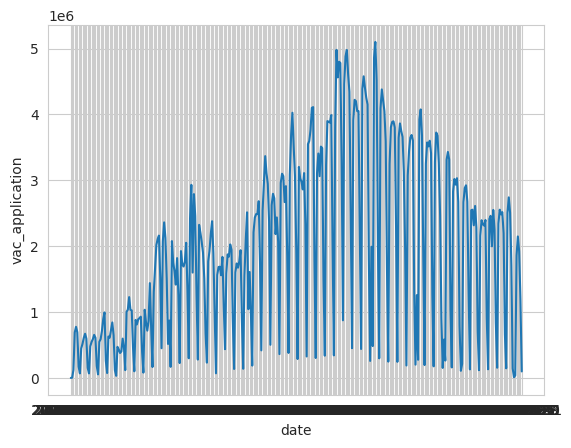

In [44]:
with sns.axes_style('whitegrid'):
  sns.lineplot(data=vacs2,
              x = vacs2.date,               
              y = 'vac_application',
              errorbar=None,
              estimator='sum');

A título de comparação, comparei com o [painel do G1](https://especiais.g1.globo.com/bemestar/vacina/2021/mapa-brasil-vacina-covid/), pois os números podem assustar na ordem de grandeza.

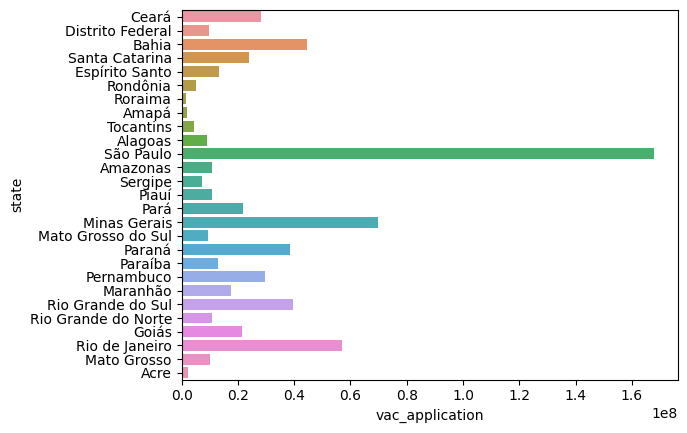

In [45]:
sns.barplot(data = vacs2,
              
              y = vacs2.state,
              x = vacs2.vac_application,
             estimator='sum',
            errorbar=None);


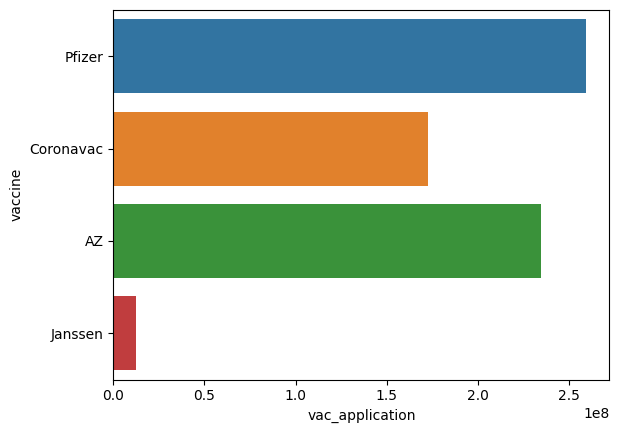

In [46]:
sns.barplot(data = vacs2,
              y = vacs2.vaccine,
              x = vacs2.vac_application,
            errorbar = None,
            estimator='sum');

###2.3.4 Extração


In [47]:
vacs2.to_csv('./covid-vaccines-uf.csv', sep=',', index=False)

## 3\. Exploração Interativa de Dados

### **3.1. KPIs** 

O dashboard de dados contem os seguintes indicadores chaves de desempenho (*key performance indicator* ou KPI) consolidados:

1. Casos e mortes nas 24 horas;
1. Média móvel (7 dias) de casos e mortes;
1. Tendência de casos e mortes;
1. Proporção de vacinados com 1ª, 2ª e 3ª doses.

### **3.2. EDA** 

O dashboard de dados contem os seguintes gráficos para a análise exploratória de dados (*exploratory data analysis*
ou EDA) interativa:

1. Distribuição do números de casos e mortes ao longo do tempo;
1. Distribuição da média móvel (7 dias) do números de casos e mortes ao longo do tempo;
1. Distribuição geográfica dos casos por estado por dia.

## 4\. Storytelling